라이브러리 불러오기

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

데이터 불러오기

In [51]:
# 착지 파일 업로드
landing_df = pd.read_csv('착지.csv')

# 주문 파일 업로드
order_mon_df = pd.read_csv('주문_월요일.csv')
order_tue_df = pd.read_csv('주문_화요일.csv')
order_wed_df = pd.read_csv('주문_수요일.csv')
order_thu_df = pd.read_csv('주문_목요일.csv')
order_fri_df = pd.read_csv('주문_금요일.csv')
order_sat_df = pd.read_csv('주문_토요일.csv')

# OD Matrix 파일 업로드
OD_csv = pd.read_csv('updated_OD_Matrix_corrected 3.csv')

# 센터 파일 업로드
center = pd.read_csv('센터.csv')

# 차량 파일 업로드 
vehicle = pd.read_csv('차량정보.csv')

착지 테이블과 주문 테이블 합치기

In [52]:
# ID와 Stop_ID를 기준으로 병합
integration_mon_df = pd.merge(landing_df[:], order_mon_df[:], left_on='ID', right_on='Stop_ID')
integration_tue_df = pd.merge(landing_df[:], order_tue_df[:], left_on='ID', right_on='Stop_ID')
integration_wed_df = pd.merge(landing_df[:], order_wed_df[:], left_on='ID', right_on='Stop_ID')
integration_thu_df = pd.merge(landing_df[:], order_thu_df[:], left_on='ID', right_on='Stop_ID')
integration_fri_df = pd.merge(landing_df[:], order_fri_df[:], left_on='ID', right_on='Stop_ID')
integration_sat_df = pd.merge(landing_df[:], order_sat_df[:], left_on='ID', right_on='Stop_ID')

# 불필요한 열 제거 (Y_y, X_y만 제거, Stop_ID는 Order_ID와 함께 유지)
integration_mon_df = integration_mon_df.drop(columns=['Y_y', 'X_y'])
integration_tue_df = integration_tue_df.drop(columns=['Y_y', 'X_y'])
integration_wed_df = integration_wed_df.drop(columns=['Y_y', 'X_y'])
integration_thu_df = integration_thu_df.drop(columns=['Y_y', 'X_y'])
integration_fri_df = integration_fri_df.drop(columns=['Y_y', 'X_y'])
integration_sat_df = integration_sat_df.drop(columns=['Y_y', 'X_y'])

# 열 이름 변경
integration_mon_df = integration_mon_df.rename(columns={'Y_x': 'Y', 'X_x': 'X'})
integration_tue_df = integration_tue_df.rename(columns={'Y_x': 'Y', 'X_x': 'X'})
integration_wed_df = integration_wed_df.rename(columns={'Y_x': 'Y', 'X_x': 'X'})
integration_thu_df = integration_thu_df.rename(columns={'Y_x': 'Y', 'X_x': 'X'})
integration_fri_df = integration_fri_df.rename(columns={'Y_x': 'Y', 'X_x': 'X'})
integration_sat_df = integration_sat_df.rename(columns={'Y_x': 'Y', 'X_x': 'X'})

# 열 순서 재정렬
cols_1 = ['Order_ID', 'ID'] + [col for col in integration_mon_df.columns if col not in ['Order_ID', 'ID']]
cols_2 = ['Order_ID', 'ID'] + [col for col in integration_tue_df.columns if col not in ['Order_ID', 'ID']]
cols_3 = ['Order_ID', 'ID'] + [col for col in integration_wed_df.columns if col not in ['Order_ID', 'ID']]
cols_4 = ['Order_ID', 'ID'] + [col for col in integration_thu_df.columns if col not in ['Order_ID', 'ID']]
cols_5 = ['Order_ID', 'ID'] + [col for col in integration_fri_df.columns if col not in ['Order_ID', 'ID']]
cols_6 = ['Order_ID', 'ID'] + [col for col in integration_sat_df.columns if col not in ['Order_ID', 'ID']]

integration_mon_df = integration_mon_df[cols_1]
integration_tue_df = integration_tue_df[cols_2]
integration_wed_df = integration_wed_df[cols_3]
integration_thu_df = integration_thu_df[cols_4]
integration_fri_df = integration_fri_df[cols_5]
integration_sat_df = integration_sat_df[cols_6]

진입제한이 1000인 테이블, 진입제한이 1000이 넘으면서 무게가 3000을 안 넘는 테이블, 진입제한이 1000을 넘으면서 무게가 3000을 넘는 테이블로 나누기

In [53]:
one_mon_df = integration_mon_df[integration_mon_df['Access_restriction'] == 1000]
one_tue_df = integration_tue_df[integration_tue_df['Access_restriction'] == 1000]
one_wed_df = integration_wed_df[integration_wed_df['Access_restriction'] == 1000]
one_thu_df = integration_thu_df[integration_thu_df['Access_restriction'] == 1000]
one_fri_df = integration_fri_df[integration_fri_df['Access_restriction'] == 1000]
one_sat_df = integration_sat_df[integration_sat_df['Access_restriction'] == 1000]
else_mon_df = integration_mon_df[integration_mon_df['Access_restriction'] != 1000]
else_tue_df = integration_tue_df[integration_tue_df['Access_restriction'] != 1000]
else_wed_df = integration_wed_df[integration_wed_df['Access_restriction'] != 1000]
else_thu_df = integration_thu_df[integration_thu_df['Access_restriction'] != 1000]
else_fri_df = integration_fri_df[integration_fri_df['Access_restriction'] != 1000]
else_sat_df = integration_sat_df[integration_sat_df['Access_restriction'] != 1000]

In [54]:
three_mon_df = else_mon_df[else_mon_df['weight'] <= 3500]
three_tue_df = else_tue_df[else_tue_df['weight'] <= 3500]
three_wed_df = else_wed_df[else_wed_df['weight'] <= 3500]
three_thu_df = else_thu_df[else_thu_df['weight'] <= 3500]
three_fri_df = else_fri_df[else_fri_df['weight'] <= 3500]
three_sat_df = else_sat_df[else_sat_df['weight'] <= 3500]
eleven_mon_df = else_mon_df[else_mon_df['weight'] > 3500]
eleven_tue_df = else_tue_df[else_tue_df['weight'] > 3500]
eleven_wed_df = else_wed_df[else_wed_df['weight'] > 3500]
eleven_thu_df = else_thu_df[else_thu_df['weight'] > 3500]
eleven_fri_df = else_fri_df[else_fri_df['weight'] > 3500]
eleven_sat_df = else_sat_df[else_sat_df['weight'] > 3500]

클러스터링 함수

In [55]:
def clustering(order_df, num_cluster):
    # Step 1: 착지 파일에서 Start_time과 End_time을 기준으로 클러스터링 (4개 클러스터)
    kmeans_time = KMeans(n_clusters=4, random_state=42)
    landing_df['Cluster_time'] = kmeans_time.fit_predict(landing_df[['Start_time', 'End_time']])

    # Step 2: 각 클러스터별로 ID 리스트를 생성
    cluster_id_lists = [[] for _ in range(4)]
    for cluster_num in range(4):
        cluster_id_lists[cluster_num] = landing_df[landing_df['Cluster_time'] == cluster_num]['ID'][:].tolist()

    # Step 3: 주문 파일에서 각 클러스터 리스트의 ID와 Stop_ID를 매칭하여 클러스터별로 데이터 분리 및 클러스터링
    location_cluster_dfs = []
    for cluster_num, id_list in enumerate(cluster_id_lists):
        cluster_time = order_df[order_df['Stop_ID'].isin(id_list)].copy()
        
        # Step 4: 각 클러스터 내에서 X와 Y를 기준으로 다시 클러스터링 (예: num_cluster 개 클러스터)
        kmeans_location = KMeans(n_clusters=num_cluster, random_state=42)
        cluster_time['Cluster_location'] = kmeans_location.fit_predict(cluster_time[['X', 'Y']])
        
        # 각 위치 클러스터별 데이터프레임을 저장할 리스트
        cluster_location_dfs = []
        for inner_cluster_num in range(num_cluster):
            cluster_location_df = cluster_time[cluster_time['Cluster_location'] == inner_cluster_num].copy()
            cluster_location_dfs.append(cluster_location_df)
        
        # 각 시간별 클러스터에 해당하는 위치별 클러스터 데이터프레임을 저장
        location_cluster_dfs.append(cluster_location_dfs)
    
    return location_cluster_dfs

In [56]:
def clustering(order_df, num_cluster):
    # Step 1: 착지 파일에서 Start_time과 End_time을 기준으로 클러스터링 (4개 클러스터)
    kmeans_time = KMeans(n_clusters=4, random_state=42)
    landing_df['Cluster_time'] = kmeans_time.fit_predict(landing_df[['Start_time', 'End_time']]) 

    # Step 2: 각 클러스터별로 ID 리스트를 생성
    cluster_id_lists = [[] for _ in range(4)]
    for cluster_num in range(4):
        cluster_id_lists[cluster_num] = landing_df[landing_df['Cluster_time'] == cluster_num]['ID'][:].tolist()

    # Step 3: 주문 파일에서 각 클러스터 리스트의 ID와 Stop_ID를 매칭하여 클러스터별로 데이터 분리 및 클러스터링
    location_cluster_dfs = []
    for cluster_num, id_list in enumerate(cluster_id_lists):
        cluster_time = order_df[order_df['Stop_ID'].isin(id_list)].copy()
        
        # Step 4: 각 클러스터 내에서 X와 Y를 기준으로 다시 클러스터링 (예: num_cluster 개 클러스터)
        kmeans_location = KMeans(n_clusters=num_cluster, random_state=42)
        cluster_time['Cluster_location'] = kmeans_location.fit_predict(cluster_time[['X', 'Y']])
        
        # 각 위치 클러스터별 데이터프레임을 저장할 리스트
        cluster_location_dfs = []
        for inner_cluster_num in range(num_cluster):
            cluster_location_df = cluster_time[cluster_time['Cluster_location'] == inner_cluster_num].copy()
            cluster_location_dfs.append(cluster_location_df)
        
        # 각 시간별 클러스터에 해당하는 위치별 클러스터 데이터프레임을 저장
        location_cluster_dfs.append(cluster_location_dfs)
    
    return location_cluster_dfs

In [57]:
mon_cluster_1 = clustering(one_mon_df, 2)
tue_cluster_1 = clustering(one_tue_df, 2)
wed_cluster_1 = clustering(one_wed_df, 2)
thu_cluster_1 = clustering(one_thu_df, 2)
fri_cluster_1 = clustering(one_fri_df, 2)
sat_cluster_1 = clustering(one_sat_df, 2)
mon_cluster_3 = clustering(three_mon_df, 7)
tue_cluster_3 = clustering(three_tue_df, 7)
wed_cluster_3 = clustering(three_wed_df, 7)
thu_cluster_3 = clustering(three_thu_df, 7)
fri_cluster_3 = clustering(three_fri_df, 7)
sat_cluster_3 = clustering(three_sat_df, 7)
mon_cluster_11 = clustering(eleven_mon_df, 2)
tue_cluster_11 = clustering(eleven_tue_df, 2)
wed_cluster_11 = clustering(eleven_wed_df, 2)
thu_cluster_11 = clustering(eleven_thu_df, 2)
fri_cluster_11 = clustering(eleven_fri_df, 2)
sat_cluster_11 = clustering(eleven_sat_df, 2)

시각화

In [58]:
# colors = ['red', 'green', 'blue', 'purple', 'orange', 'cyan', 'magenta']

# plt.figure(figsize=(15, 10))

# for time_cluster_num, location_clusters in enumerate(result):
#     for loc_cluster_num, df in enumerate(location_clusters):
#         plt.scatter(df['X'], df['Y'], color=colors[loc_cluster_num % len(colors)],
#                     label=f'Time Cluster {time_cluster_num}, Location Cluster {loc_cluster_num}' if time_cluster_num == 0 else "")

# plt.xlabel('X Coordinate')
# plt.ylabel('Y Coordinate')
# plt.title('Clustered Locations')
# plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
# plt.show()

착지별 OD Matrix 함수

In [59]:
def OD_Matrix(Bin):
    # OriginID와 DestinationID 리스트
    origin_ids = Bin[:]
    destination_ids = Bin[:]

    # 리스트에 termianl 추가
    origin_ids.append('Terminal')
    destination_ids.append('Terminal')

    # 데이터를 필터링하여 필요한 OriginID와 DestinationID만 남기기
    filtered_data = OD_csv[(OD_csv['OriginID'].isin(origin_ids)) & OD_csv['DestinationID'].isin(destination_ids)]

    # 피벗 테이블을 사용하여 2차원 OD Matrix 만들기 (Total_Time 기준)
    od_time = filtered_data.pivot(index='OriginID', columns='DestinationID', values='Total_Time')
    od_distance = filtered_data.pivot(index='OriginID', columns='DestinationID', values='Total_Distance')

    return od_distance, od_time

빈 생성 알고리즘

In [60]:
def sort_and_make_bin(cluster, max_weight=3500, max_plt=8, MaxCount=15):
    
    # 각 Stop_ID에 해당하는 Order_ID 리스트와 총 무게, total_plt를 계산하여 데이터프레임 생성
    stop_order_map = cluster.groupby('Stop_ID')['Order_ID'].apply(list).reset_index()
    stop_order_map['total_weight'] = cluster.groupby('Stop_ID')['weight'].sum().values
    stop_order_map['total_plt'] = cluster.groupby('Stop_ID')['plt'].sum().values

    # total_weight를 기준으로 내림차순 정렬하여 무거운 주문부터 처리
    stop_order_map = stop_order_map.sort_values(by='total_weight', ascending=False).reset_index(drop=True)
    
    grouped_orders = []  # 그룹화된 주문을 저장할 리스트
    grouped_stop_ids = []  # 그룹화된 Stop_ID를 저장할 리스트
    group_weights = []  # 각 그룹의 총 무게 리스트 (이차원 리스트)
    group_plts = []  # 각 그룹의 총 팔레트 수 리스트 (이차원 리스트)
    
    current_group = []   # 현재 그룹의 주문을 저장할 리스트
    current_stop_ids = []  # 현재 그룹의 Stop_ID를 저장할 리스트
    current_weight = 0   # 현재 그룹의 총 무게를 저장할 변수
    current_plt = 0      # 현재 그룹의 총 팔레트 수를 저장할 변수
    not_check_orders = list(cluster['Order_ID'])  # 처리되지 않은 주문 ID 리스트
    
    while not_check_orders:  # not_check_orders 리스트가 비어있지 않은 동안 루프를 계속 실행. 즉, 처리되지 않은 주문이 남아 있는 한 계속 실행
        any_order_processed = False # 루프가 한 번이라도 실행되는지 확인하기 위한 플래그 변수 초기화
        
        for idx, row in stop_order_map.iterrows():  # stop_order_map의 각 행을 순회하며 Stop_ID와 Order_ID를 가져옴
            stop_id = row['Stop_ID']
            orders = row['Order_ID']
            
            # 같은 착지의 주문들은 무조건 같은 그룹에 포함
            group_weight = sum(cluster[cluster['Order_ID'].isin(orders)]['weight']) # orders 리스트에 포함된 주문들의 총 무게를 계산하여 group_weight 변수에 저장
            group_plt = sum(cluster[cluster['Order_ID'].isin(orders)]['plt']) # orders 리스트에 포함된 주문들의 총 팔레트 수를 계산하여 group_plt 변수에 저장
            
            if (current_weight + group_weight <= max_weight and 
                current_plt + group_plt <= max_plt and 
                len(current_stop_ids) + 1 <= MaxCount): # 현재 그룹에 새로운 주문들을 추가했을 때, 최대 무게, 최대 팔레트 수 및 최대 착지 수를 초과하지 않는지 확인
                current_group.extend(orders) # orders 리스트의 주문들을 current_group에 추가
                current_weight += group_weight 
                current_plt += group_plt
                if stop_id not in current_stop_ids: # 현재 그룹에 stop_id가 포함되어 있지 않다면 current_stop_ids에 추가
                    current_stop_ids.append(stop_id)
                for order in orders:
                    if order in not_check_orders: # 주문이 not_check_orders에 있으면
                        not_check_orders.remove(order) # not_check_orders에서 주문을 제거
                any_order_processed = True
            
            if current_weight >= max_weight or current_plt >= max_plt or len(current_stop_ids) >= MaxCount: 
                # 현재 그룹의 총 무게가 최대 무게에 도달하거나, 총 팔레트 수가 최대 팔레트 수에 도달했거나, 착지 수가 최대 착지 수에 도달했는지 확인
                break # 이 조건이 참이면, 더 이상 현재 그룹에 주문을 추가하지 않기 위해 반복문을 종료
        
        # 현재 그룹을 저장하고 새로운 그룹 시작
        if any_order_processed: # 이번 루프에서 주문이 추가되었는지 확인해서 만약 하나라도 추가된 경우, 현재 그룹을 저장하고 새로운 그룹을 시작
            stop_weights = [sum(cluster[(cluster['Stop_ID'] == sid) & (cluster['Order_ID'].isin(current_group))]['weight']) for sid in current_stop_ids]
            stop_plts = [sum(cluster[(cluster['Stop_ID'] == sid) & (cluster['Order_ID'].isin(current_group))]['plt']) for sid in current_stop_ids]
            grouped_orders.append(current_group)
            grouped_stop_ids.append(current_stop_ids)
            group_weights.append(stop_weights)
            group_plts.append(stop_plts)
            current_group = [] # current_group을 초기화하여 새로운 그룹을 시작할 준비
            current_stop_ids = [] # current_stop_ids를 초기화하여 새로운 그룹을 시작할 준비
            current_weight = 0 # current_weight 초기화
            current_plt = 0 # current_plt 초기화
            
            # stop_order_map에서 이미 처리된 주문을 제거
            # apply 함수로 각 Order_ID 리스트가 not_check_orders에 없는 경우를 필터링
            stop_order_map = stop_order_map[~stop_order_map['Order_ID'].apply(lambda x: all(order not in not_check_orders for order in x))]
            stop_order_map.reset_index(drop=True, inplace=True) # stop_order_map의 인덱스를 재설정하고, drop=True로 기존 인덱스를 제거
        
        # 무한 루프 방지: 주문이 제거되지 않은 경우 루프를 탈출
        if not any_order_processed:
            break

    # 남은 그룹 추가
    if current_group: # 현재 그룹에 주문이 남아 있는 경우, 이 그룹을 저장
        stop_weights = [sum(cluster[(cluster['Stop_ID'] == sid) & (cluster['Order_ID'].isin(current_group))]['weight']) for sid in current_stop_ids]
        stop_plts = [sum(cluster[(cluster['Stop_ID'] == sid) & (cluster['Order_ID'].isin(current_group))]['plt']) for sid in current_stop_ids]
        grouped_orders.append(current_group)
        grouped_stop_ids.append(current_stop_ids)
        group_weights.append(stop_weights)
        group_plts.append(stop_plts)

    return grouped_orders, grouped_stop_ids, group_weights, group_plts

In [61]:
# 함수 실행 예시
grouped_orders, grouped_stop_ids, group_weights, group_plts = sort_and_make_bin(mon_cluster_3[3][0])

print(f"Grouped Orders: {grouped_orders}")
print(f"Grouped Stop IDs: {grouped_stop_ids}")
print(f"Group Weights: {group_weights}")
print(f"Group Plts: {group_plts}")

Grouped Orders: [['O_562', 'O_1702', 'O_1703', 'O_383', 'O_1093', 'O_276', 'O_129'], ['O_287', 'O_773', 'O_281', 'O_556', 'O_126'], ['O_447', 'O_1761', 'O_1762', 'O_1763', 'O_1764', 'O_1765', 'O_1766', 'O_374', 'O_762', 'O_763', 'O_125'], ['O_315', 'O_758', 'O_759', 'O_380', 'O_723', 'O_139', 'O_1140', 'O_1141'], ['O_328', 'O_1319', 'O_1320', 'O_314', 'O_1433', 'O_1434', 'O_1435']]
Grouped Stop IDs: [['S_935', 'S_642', 'S_469', 'S_228'], ['S_486', 'S_476', 'S_924', 'S_225'], ['S_749', 'S_631', 'S_224'], ['S_539', 'S_638', 'S_244'], ['S_560', 'S_536']]
Group Weights: [[2638.7200000000003, 507.1, 344.4, 7.64], [2508.81, 898.21, 49.18, 43.54], [2259.33, 1109.59, 101.19], [1274.02, 1255.04, 425.45], [1081.51, 996.19]]
Group Plts: [[2.24, 0.74, 0.45, 0.12], [5.23, 1.35, 0.14, 0.18], [3.27, 1.92, 0.12], [2.66, 3.47, 1.0], [2.0, 2.11]]


시각 계산 함수

In [62]:
def min_cal(current_time, add_min = 0, plt = 0):
    # 현재 시간을 시와 분으로 분리
    current_hour = int(current_time)
    current_min = (current_time - current_hour)*100 

    add_time_hour = add_min //60
    add_time_min = add_min % 60 
    
    # plt의 개수당 10분을 추가
    additional_minutes = (plt * 10) % 60 
    additional_houres = (plt * 10) // 60

    # 총 분 계산 (기존 분 + 추가할 분 + plt에 의한 추가 분)
    new_time_hour = current_hour + add_time_hour + additional_houres
    new_time_min = current_min + add_time_min + additional_minutes
    new_time = new_time_hour + (new_time_min // 60) + (new_time_min % 60 /100)
        
    return new_time

라우팅 알고리즘

In [63]:
# 초기해(근사 최적해)를 구하는 Nearest Neighbor 알고리즘
def nearest_neighbor(matrix):
    start_node = 'Terminal'
    n = len(matrix)
    visited = {node: False for node in matrix.index}
    path = [start_node]
    current_node = start_node
    visited[current_node] = True

    while len(path) < n:
        current_index = current_node
        next_node = None
        min_distance = float('inf')
        
        for node in matrix.index:
            if not visited[node] and matrix.loc[current_index, node] < min_distance:
                min_distance = matrix.loc[current_index, node]
                next_node = node
        
        if next_node is None:
            break
        
        path.append(next_node)
        visited[next_node] = True
        current_node = next_node
    path.append('Terminal')
    return path


# 초기해의 꼬인 경로를 푸는 알고리즘
def two_opt(path, matrix):
    def path_cost(path):
        cost = 0
        for i in range(len(path) - 1):
            cost += matrix.loc[path[i], path[i + 1]]
        return cost

    improved = True
    max_no_improve = 10  # 개선이 없을 때 최대 반복 횟수
    no_improve_count = 0

    while improved and no_improve_count < max_no_improve:
        improved = False
        for i in range(1, len(path) - 2):
            for j in range(i + 1, len(path)):
                if j - i == 1: 
                    continue
                new_path = path[:i] + path[i:j][::-1] + path[j:]
                if path_cost(new_path) < path_cost(path):
                    path = new_path
                    improved = True
                    no_improve_count = 0  # 개선이 있으면 카운터 초기화
        if not improved:
            no_improve_count += 1  # 개선이 없으면 카운터 증가
    return path

Route 시각화

In [64]:
def visualization(route):
    # 'Terminal'을 제외한 route 입력
    stop_id_list = [order_id for order_id in route if order_id != 'Terminal']

    # route에 포함된 Stop_ID로 필터링된 데이터프레임 생성
    filtered_df = landing_df[landing_df['ID'].isin(stop_id_list)]

    # Stop_ID가 route 순서대로 정렬된 데이터프레임 생성
    sorted_df = filtered_df.set_index('ID').reindex(stop_id_list).reset_index()

    X_coords = sorted_df['X'].tolist()
    Y_coords = sorted_df['Y'].tolist()
    X_coords.insert(0, 126.93562321)
    X_coords.append(126.93562321)
    Y_coords.insert(0, 37.33186943)
    Y_coords.append(37.33186943)

    plt.figure(figsize=(10, 6))
    plt.scatter(X_coords, Y_coords, color='blue', marker='o', s=10)
    plt.plot(X_coords, Y_coords)
    plt.title('Order Locations')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.grid(True)
    plt.show()

이동시간, 이동거리 계산 함수

In [65]:
def moving_time(path, od_time):
    moving_time_tmp = 0
    for i in range(len(path) - 1):
        moving_time_tmp += od_time.loc[path[i], path[i + 1]]
    out_time_tmp = od_time.loc[path[0], path[1]]  # 터미널에서 첫 착지로 이동하는데 걸린 시간
    in_time_tmp = od_time.loc[path[-2], path[-1]]  # 마지막 착지에서 터미널로 복귀하는데 걸린 시간
    working_time_tmp = moving_time_tmp - (out_time_tmp + in_time_tmp)  # 움직이는 총 시간
    moving_time = min_cal(0, moving_time_tmp, 0)
    working_time = min_cal(0, working_time_tmp, 0)
    out_time = min_cal(0, out_time_tmp, 0)
    in_time = min_cal(0, in_time_tmp, 0)
    return moving_time, working_time, out_time, in_time

def route_distance(path, od_distance):
    distance = 0
    for i in range(len(path)-1):
        distance += od_distance.loc[path[i],path[i+1]]
    return distance

하차시간 계산 함수

In [66]:
def unloading_time(stop_id_list, plt_list): # plt에 따른 하차하는데 걸린 시간(분) (고정시간+변동시간)
    tmp = 0
    for i in range(len(stop_id_list)):
        tmp += 5
    for i in range(len(plt_list)):
        tmp += plt_list[i]*10
    unloading_time = tmp
    return unloading_time 

In [68]:
grouped_orders, grouped_stop_ids, group_weights, group_plts = sort_and_make_bin(mon_cluster_3[3][0])
print(grouped_orders)
print(grouped_stop_ids)
print(group_weights)
print(group_plts)

[['O_562', 'O_1702', 'O_1703', 'O_383', 'O_1093', 'O_276', 'O_129'], ['O_287', 'O_773', 'O_281', 'O_556', 'O_126'], ['O_447', 'O_1761', 'O_1762', 'O_1763', 'O_1764', 'O_1765', 'O_1766', 'O_374', 'O_762', 'O_763', 'O_125'], ['O_315', 'O_758', 'O_759', 'O_380', 'O_723', 'O_139', 'O_1140', 'O_1141'], ['O_328', 'O_1319', 'O_1320', 'O_314', 'O_1433', 'O_1434', 'O_1435']]
[['S_935', 'S_642', 'S_469', 'S_228'], ['S_486', 'S_476', 'S_924', 'S_225'], ['S_749', 'S_631', 'S_224'], ['S_539', 'S_638', 'S_244'], ['S_560', 'S_536']]
[[2638.7200000000003, 507.1, 344.4, 7.64], [2508.81, 898.21, 49.18, 43.54], [2259.33, 1109.59, 101.19], [1274.02, 1255.04, 425.45], [1081.51, 996.19]]
[[2.24, 0.74, 0.45, 0.12], [5.23, 1.35, 0.14, 0.18], [3.27, 1.92, 0.12], [2.66, 3.47, 1.0], [2.0, 2.11]]


시간 제약에 따른 빈 분할

In [69]:
def Bin_Slicing(grouped_stop_ids, group_plts): 
    grouped_stop_ids_list = grouped_stop_ids.copy()
    new_bin_list = []
    new_moving_time_list = []
    new_working_time_list = []
    new_out_time_list = []
    new_in_time_list = []
    
    while grouped_stop_ids_list:  # 리스트에 요소가 남아있는 동안 반복
        tmp_stop_ids = grouped_stop_ids_list.pop(0)  # 첫 번째 원소를 가져와서 제거
        tmp_plts = group_plts.pop(0)

        for j in range(len(tmp_stop_ids)-1, -1, -1):
            tmp_stop_ids_range = tmp_stop_ids[:j+1]
            tmp_plts_range = tmp_plts[:j+1]

            od_distance, od_time = OD_Matrix(tmp_stop_ids_range)
            initial_path = nearest_neighbor(od_distance)
            optimized_path = two_opt(initial_path, od_distance)
            time_moving, time_working, time_out, time_in = moving_time(optimized_path, od_time) 
            unload_time = unloading_time(tmp_stop_ids_range, tmp_plts_range)
            total_time_working = min_cal(time_working, unload_time, 0)

            if total_time_working <= 2:
                new_bin_list.append(tmp_stop_ids[:j+1])
                distance, time = OD_Matrix(tmp_stop_ids[:j+1])
                initial_path = nearest_neighbor(distance)
                optimized_path = two_opt(initial_path, distance)
                new_time_moving, new_time_working, new_time_out, new_time_in = moving_time(optimized_path, time)
                new_unload_time = unloading_time(tmp_stop_ids_range, tmp_plts_range)
                new_total_time_working = min_cal(new_time_working, new_unload_time, 0)

                new_moving_time_list.append(new_time_moving)
                new_working_time_list.append(new_total_time_working)
                new_out_time_list.append(new_time_out)
                new_in_time_list.append(new_time_in)

                if j+1 < len(tmp_stop_ids):  # 남은 원소가 있는 경우만 추가
                    grouped_stop_ids_list.append(tmp_stop_ids[j+1:])
                    group_plts.append(tmp_plts[j+1:])
                break

    return new_bin_list, new_moving_time_list, new_working_time_list, new_out_time_list, new_in_time_list

In [70]:
a, b, c, d, e = Bin_Slicing(grouped_stop_ids, group_plts)
print(a)
print(b)
print(c)
print(d)
print(e)

[['S_935', 'S_642'], ['S_486', 'S_476'], ['S_749'], ['S_539', 'S_638'], ['S_560', 'S_536'], ['S_469', 'S_228'], ['S_924', 'S_225'], ['S_631', 'S_224'], ['S_244']]
[3.0859947815155904, 2.1307119220749122, 1.4181052032967838, 3.2917787266610126, 2.5702817991955884, 2.376660089464119, 3.183162528914136, 2.3317336231054333, 1.5805522281484237]
[1.1244981835790373, 1.4546205257017752, 0.377, 1.589774410119854, 1.1218290300012526, 1.0430565686408793, 1.0488810415921914, 1.049588866789567, 0.15]
[1.1760560530523545, 0.5631121319804214, 0.5222598492698234, 1.252095730820079, 1.1223658196037996, 1.0069673856182493, 0.5596634674930958, 1.1304649986990922, 0.5998960870572533]
[1.1834405448841987, 0.47097926439271537, 0.4958453540269605, 1.1629085857210797, 1.2370869495905361, 0.48363613520499066, 1.3066180198288484, 0.45567975761677404, 0.5806561410911705]


Route 시각화

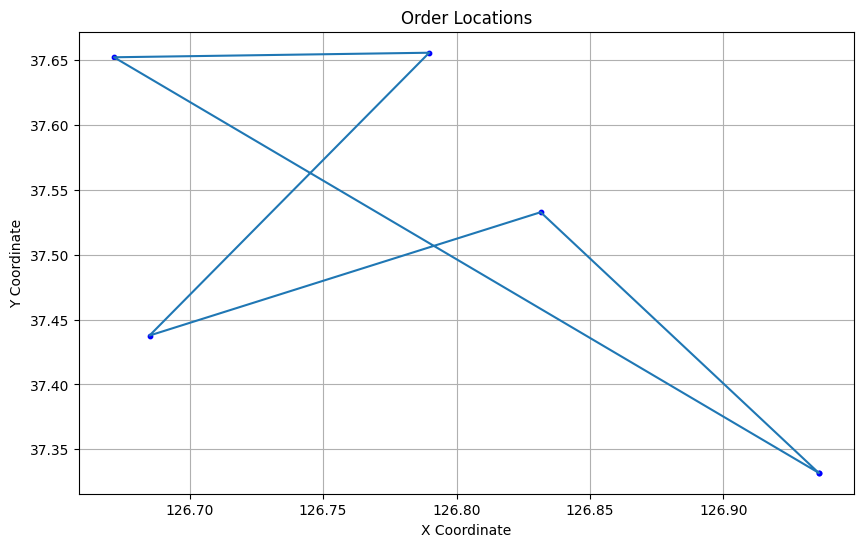

In [ ]:
visualization(over_stop_ids[0])